![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BQm_EV6i0_j80CQZ8vcLvw/SN-web-lightmode.png)


# **Lab: Creating Custom Layers and Models**

###### Estimated time needed:  30 minutes  

In this lab, you will learn to create custom layers and integrate them into a Keras model. You will compile, train, and evaluate the model. 

##### Learning objectives 

By the end of this lab, you will: 
- Create custom layers and integrate them into a Keras model 
- Compile, train, and evaluate the model 

##### Prerequisites:
- Basic understanding of Python and Keras. 


#### Steps 

**Step 1: Import libraries**

Before you start, import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
!pip install tensorflow==2.16.2
!pip install pydot
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

2025-03-17 10:51:17.936708: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 10:51:17.954339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-17 10:51:17.998714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-17 10:51:17.998877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 10:51:18.020768: I tensorflow/core/platform/cpu_feature_gua

**Step 2: Define a custom layer**

Define a custom dense layer with 32 units and ReLU activation.


In [2]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)


**Step 3: Integrate the custom layer into a model**

Create a Keras model using the custom layer. 


In [3]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])


The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


**Step 4: Compile the model**

Compile the model with the Adam optimizer and categorical cross-entropy loss. 


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary before building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the model**

Train the model on some example data. For this example, you will generate random data for training. In practice, use a real data set. 


In [5]:
import numpy as np 

# Generate random data 
x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

# Convert labels to categorical one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3032   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3015 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3007 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3005 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3000 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2999 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2945 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2937 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2919 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2949 


**Step 6: Evaluate the model**

Evaluate the model using test data to see its performance. 

For this example, you will generate random test data. In practice, use a real data set. 


In [6]:
# Generate random test data 
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

# Convert labels to categorical one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

# Evaluate the model 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3002  
Test loss: 2.3075191974639893


### Exercises


#### Exercise 1: Visualize Model Architecture

**Objective:** Visualize the architecture of the custom Keras model to understand its structure.

**Instructions:**
1. Use the `plot_model` function from `tensorflow.keras.utils` to visualize the model architecture.
2. Save the plot as an image file.


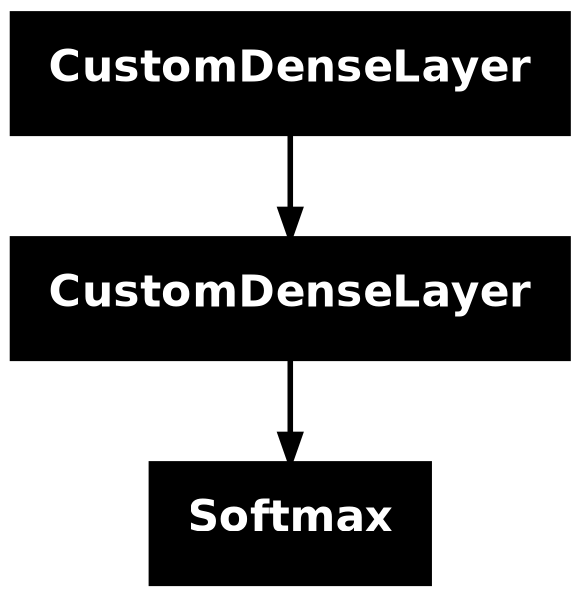

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model)

<details>
    <summary>Click here for Solution</summary>

```python

!pip install pydot graphviz

from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


 ```   

</details>


#### Exercise 2: Add Dropout Layer

**Objective:** Enhance the model by adding a Dropout layer to prevent overfitting.

**Instructions:**
1. Add a Dropout layer between the custom dense layers.
2. Recompile the model and observe the impact on training.


In [8]:
from tensorflow.keras.layers import Dropout

# Define the model with Softmax in the output layer
model1 = Sequential([
    CustomDenseLayer(128),
    Dropout(rate=0.6),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])

model1.compile(optimizer='adam', loss='categorical_crossentropy')
model1.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3013   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3007 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3040 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3016 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2954 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2987 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2885 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2998 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2979 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2993 


<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer
model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)
 ```   

</details>


#### Exercise 3: Adjust the Number of Units in Custom Layer

**Objective:** Experiment with different numbers of units in the custom dense layer to observe the impact on performance.

**Instructions:**
1. Change the number of units in the `CustomDenseLayer` to 128.
2. Recompile, train, and evaluate the model.


In [9]:

# Define the model with Softmax in the output layer
model1 = Sequential([
    CustomDenseLayer(128),
    Dropout(rate=0.6),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])

model1.compile(optimizer='adam', loss='categorical_crossentropy')
model1.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3019   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3034 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2978 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2981 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2963 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2965 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2959 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2976 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2935 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2968 


<details>
    <summary>Click here for Solution</summary>

```python

# Define a custom layer with 128 units
class CustomDenseLayer(Layer):
    def __init__(self, units=128):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

# Integrate the new custom layer into a model
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)
 ```   

</details>


### Summary

By completing these exercises, students will:

1. Visualize the architecture of their custom Keras model.
2. Understand the impact of adding Dropout layers to prevent overfitting.
3. Experiment with different configurations of the custom dense layer to observe performance changes.


## Conclusion 

Congratulations! You have successfully created and trained a custom layer in Keras. This lab exercise demonstrated how to extend Keras’s capabilities by creating custom layers and integrating them into a model. 


Copyright © IBM Corporation. All rights reserved.